## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
# to avoid un neccessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing neccessory library for analysing data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the two CSV files
CreditBureau = pd.read_csv('Credit Bureau data.csv', sep = ",")
demographics = pd.read_csv('Demographic data.csv', sep = ",")

In [3]:
print (CreditBureau.shape)
print (demographics.shape)


(71295, 19)
(71295, 12)


In [4]:
print (CreditBureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

There are 11 independent variabe and 1 dependent variable "Performance.Tag", 
with 7 integer and 5 categorical variables.

In [5]:
print (demographics.info)

<bound method DataFrame.info of        Application ID  Age Gender Marital Status (at the time of application)  \
0           954457215   48      F                                     Married   
1           432830445   31      M                                     Married   
2           941387308   32      M                                      Single   
3           392161677   43      M                                     Married   
4           182011211   35      F                                     Married   
5           312196805   20      M                                     Married   
6           532217204   42      M                                     Married   
7            74788849   34      M                                     Married   
8           782743811   30      M                                     Married   
9            96964957   22      M                                      Single   
10          547975524   37      M                                     Married

[71295 rows x 12 columns]>


There are 18 independent variable and 1 dependent variable "Performance.Tag", 
and all variables are of integer type 

In [6]:
#list(set(CreditBureau['Application ID'])-set(demographics['Application ID']))
print(list(set(CreditBureau['Application ID'])-set(demographics['Application ID'])))

[]


### Identifying Data quality issues

In [7]:
CreditBureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [8]:
demographics.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [9]:
# idendifing and deleting duplicate Application ID from data frame
#Removing both entries of duplicate application ids as it is not possible to identify the correct entry among duplicates

CreditBureau = CreditBureau.drop_duplicates(['Application ID'], keep='last')   
demographics = demographics.drop_duplicates(['Application ID'], keep='last')   


In [10]:
# selecting rows based on condition 
rejected_credit = CreditBureau[CreditBureau['Performance Tag'].isnull() ] 
rejected_credit = demographics[demographics['Performance Tag'].isnull() ] 

In [11]:
rejected_credit.shape

(1425, 12)

In [12]:
CreditBureau = CreditBureau[CreditBureau['Performance Tag'].notnull()]
demographics = demographics[demographics['Performance Tag'].notnull()]

In [13]:
CreditBureau.shape

(69867, 19)

We have 69870 row of data for process

In [14]:
# Taking backup of the datasets
credit_wo_woe = CreditBureau
demo_wo_woe = demographics

In [15]:
credit_wo_woe.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


#### WOE Analaysis and IV (Information Value)

### Exploratory data analysis

###### UNIVARIATE ANALYSIS 

[]

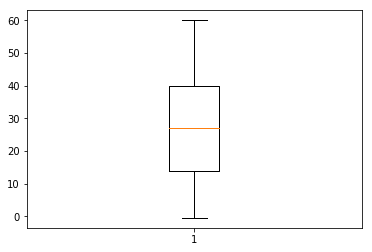

In [16]:
plt.boxplot(demo_wo_woe['Income'])
plt.plot()
#Print(demo_wo_woe['Income'].sum)

27.0


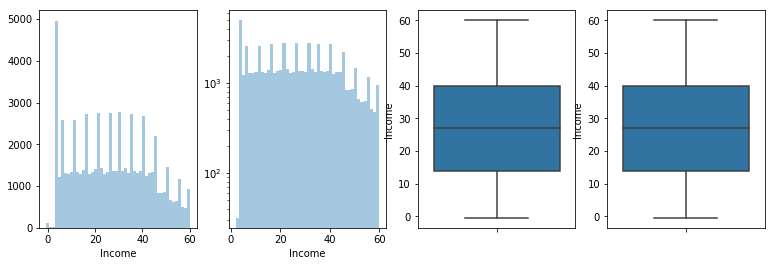

In [17]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe.Income.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe.Income.dropna()[demo_wo_woe.Income > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe.Income, ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe.Income, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"Income"].median())

Median income of applicants is 27 units and there are no outliers

45.0


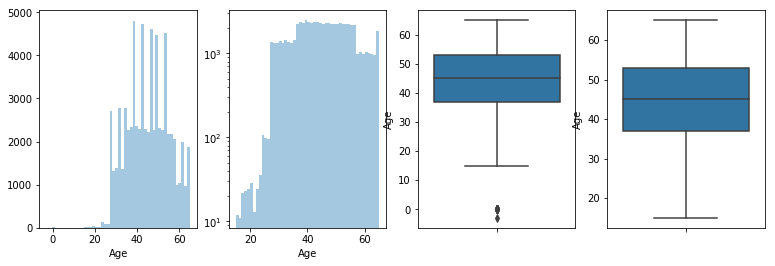

In [18]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe.Age.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe.Age.dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe.Age, ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe.Age, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"Age"].median())

Median Age of applicants is 45 years and there are few outliers

10.0


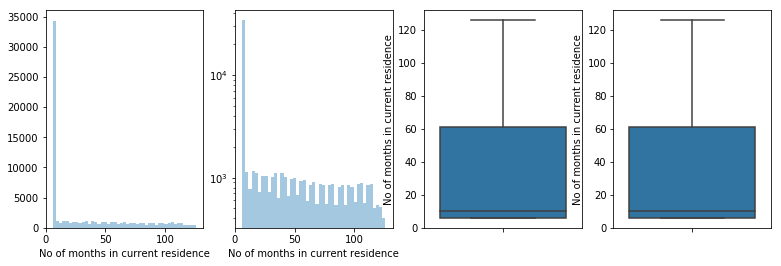

In [19]:
##No.of.months.in.current.residence

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe['No of months in current residence'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe['No of months in current residence'].dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe['No of months in current residence'], ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe['No of months in current residence'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"No of months in current residence"].median())

34.0


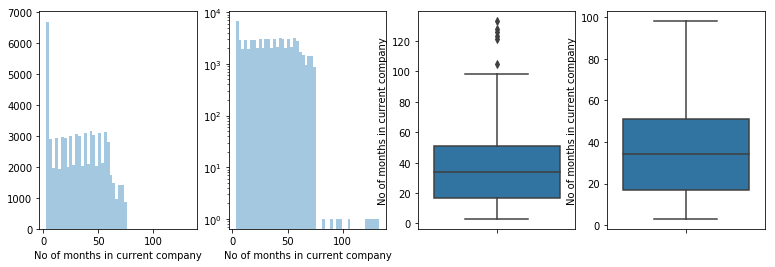

In [20]:
##No of months in current company

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe['No of months in current company'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe['No of months in current company'].dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe['No of months in current company'], ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe['No of months in current company'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"No of months in current company"].median())

3.0


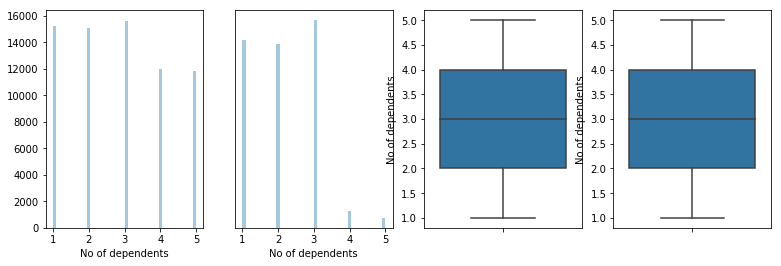

In [21]:
##No of dependents

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe['No of dependents'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe['No of dependents'].dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe['No of dependents'], ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe['No of dependents'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"No of dependents"].median())

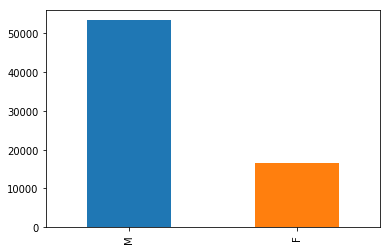

In [22]:
demo_wo_woe['Gender'].value_counts().head(10).plot.bar()

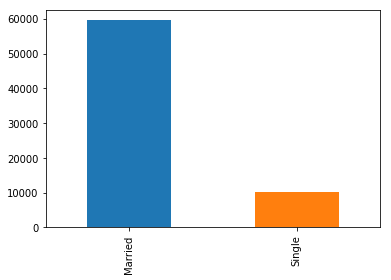

In [23]:
demo_wo_woe['Marital Status (at the time of application)'].value_counts().head(10).plot.bar()

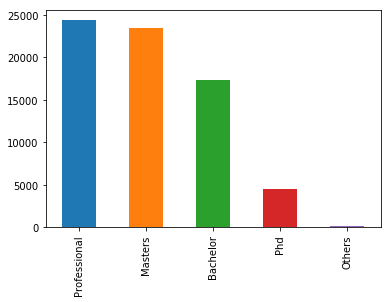

In [24]:
demo_wo_woe['Education'].value_counts().head(10).plot.bar()

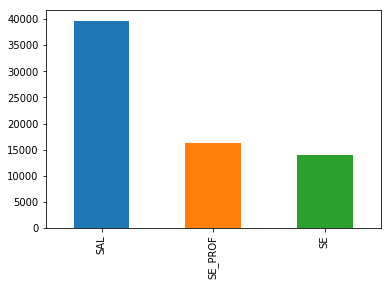

In [25]:
demo_wo_woe = demo_wo_woe.rename(columns = {"Profession ": "Profession"}) 
demo_wo_woe['Profession'].value_counts().head(10).plot.bar()

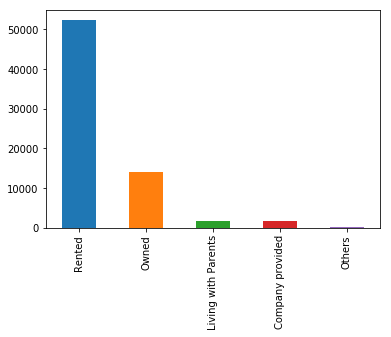

In [26]:
demo_wo_woe['Type of residence'].value_counts().head(10).plot.bar()

#### Uni Variate analysis for Credit bureau data data

0.0


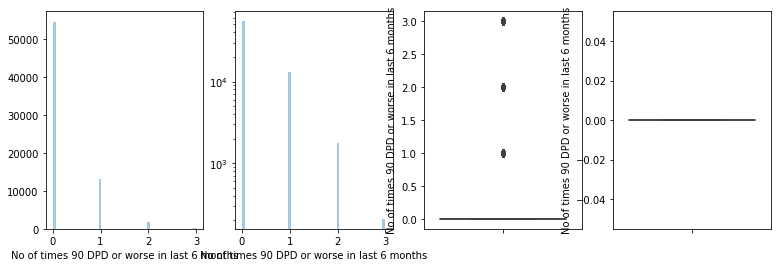

In [27]:
## No of times 90 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 90 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 90 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 90 DPD or worse in last 6 months"].median())

0.0


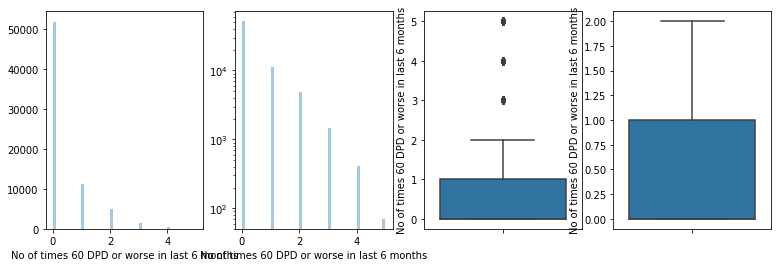

In [28]:
## No of times 60 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 60 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 60 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 60 DPD or worse in last 6 months"].median())

0.0


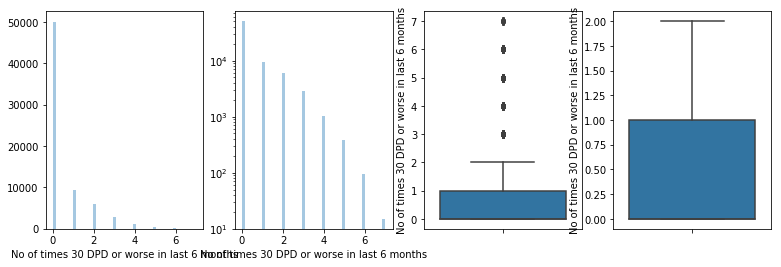

In [29]:
## No of times 30 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 30 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 30 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 30 DPD or worse in last 6 months"].median())

0.0


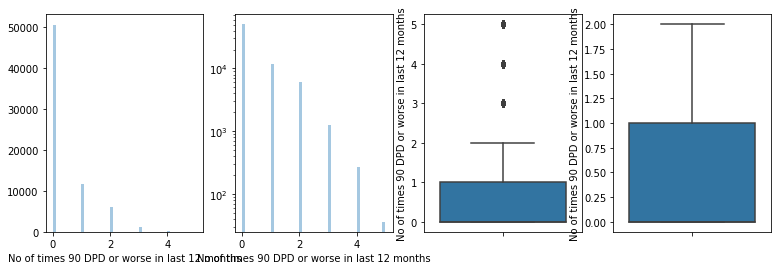

In [30]:
## No of times 90 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 90 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 90 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 90 DPD or worse in last 12 months"].median())

0.0


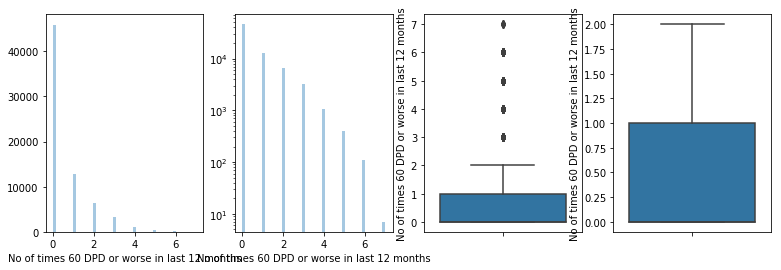

In [31]:
## No of times 60 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 60 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 60 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 60 DPD or worse in last 12 months"].median())

0.0


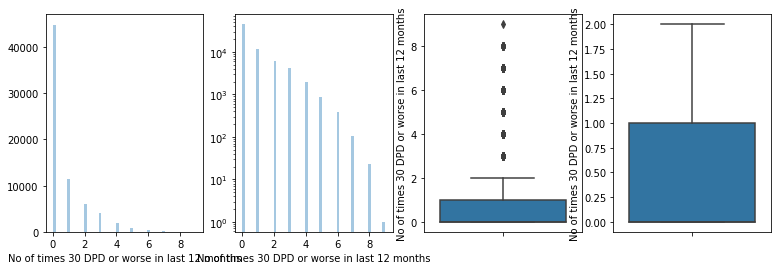

In [32]:
## No of times 90 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 30 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 30 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 30 DPD or worse in last 12 months"].median())

15.0


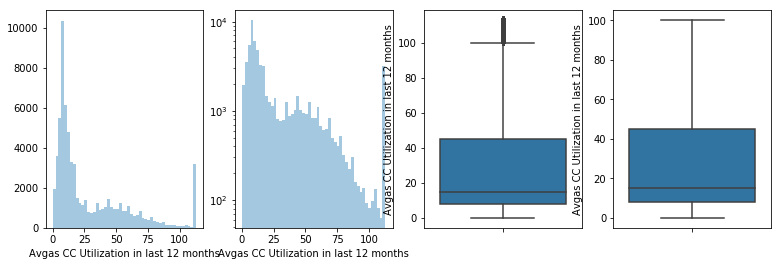

In [33]:
# Avgas CC Utilization in last 12 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['Avgas CC Utilization in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['Avgas CC Utilization in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['Avgas CC Utilization in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['Avgas CC Utilization in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"Avgas CC Utilization in last 12 months"].median())

2.0


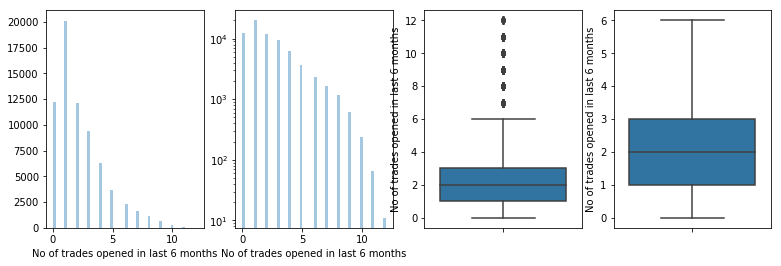

In [34]:
# No of trades opened in last 6 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of trades opened in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of trades opened in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of trades opened in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of trades opened in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of trades opened in last 6 months"].median())

4.0


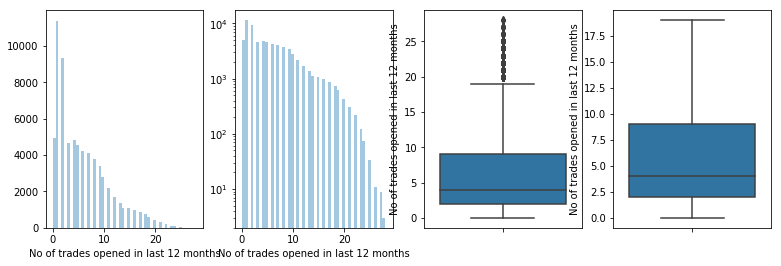

In [35]:
# No of trades opened in last 12 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of trades opened in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of trades opened in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of trades opened in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of trades opened in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of trades opened in last 12 months"].median())

6.0


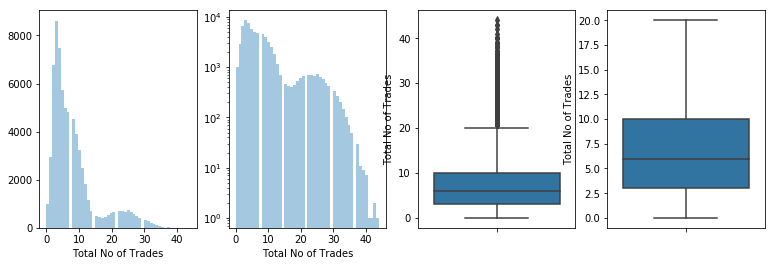

In [36]:
# Total No of Trades 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['Total No of Trades'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['Total No of Trades'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['Total No of Trades'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['Total No of Trades'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"Total No of Trades"].median())

2.0


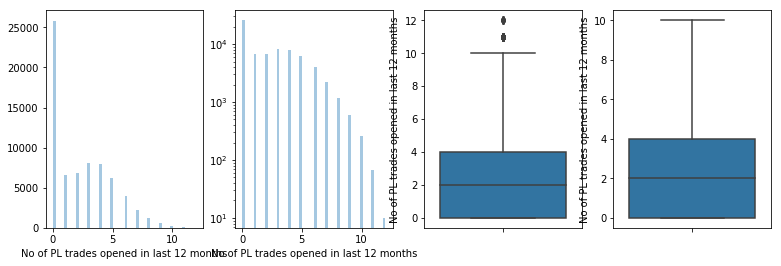

In [37]:
# No of PL trades opened in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of PL trades opened in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of PL trades opened in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of PL trades opened in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of PL trades opened in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of PL trades opened in last 12 months"].median())

1.0


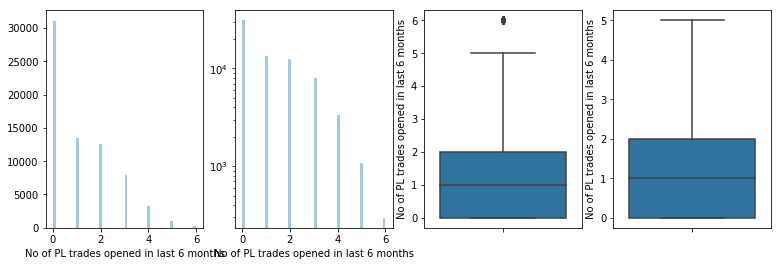

In [38]:
# No of PL trades opened in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of PL trades opened in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of PL trades opened in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of PL trades opened in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of PL trades opened in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of PL trades opened in last 6 months"].median())

1.0


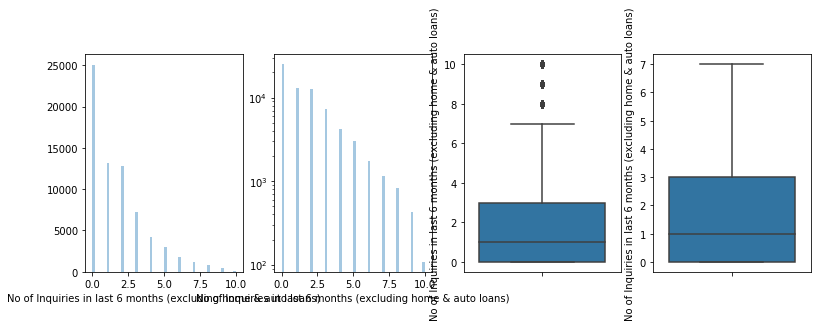

In [39]:
#No of Inquiries in last 6 months  excluding home   auto loans 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of Inquiries in last 6 months (excluding home & auto loans)"].median())


3.0


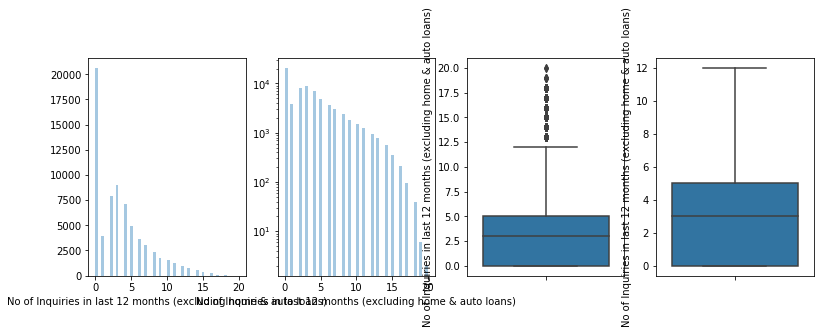

In [40]:
#No of Inquiries in last 12 months  excluding home   auto loans 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of Inquiries in last 12 months (excluding home & auto loans)"].median())

774241.0


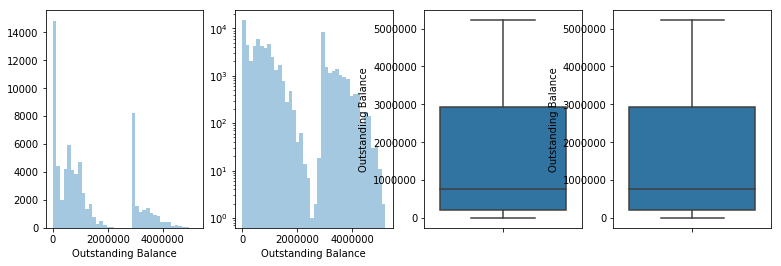

In [41]:
#Outstanding Balance
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['Outstanding Balance'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['Outstanding Balance'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['Outstanding Balance'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['Outstanding Balance'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"Outstanding Balance"].median())

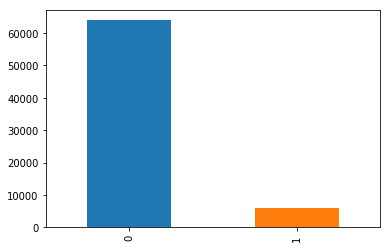

In [42]:
CreditBureau['Presence of open auto loan'].value_counts().head(10).plot.bar()

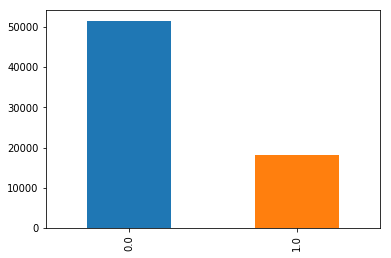

In [43]:
CreditBureau['Presence of open home loan'].value_counts().head(10).plot.bar()

### BIVARIATE ANALYSIS

#### Demographic data

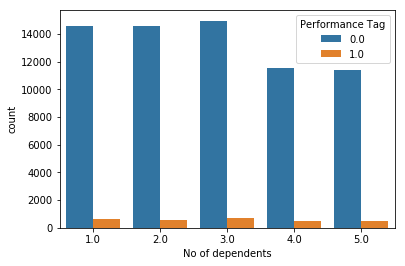

In [44]:
p = sns.countplot(data=demo_wo_woe, x = 'No of dependents',hue = 'Performance Tag')

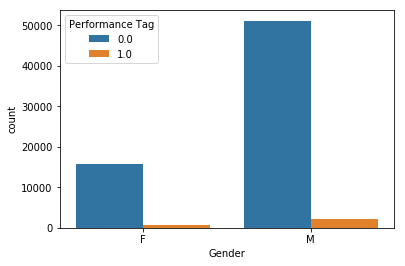

In [45]:
p = sns.countplot(data=demo_wo_woe, x = 'Gender',hue = 'Performance Tag')

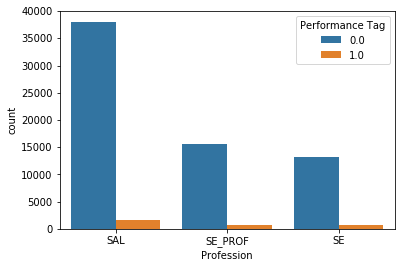

In [46]:
p = sns.countplot(data=demo_wo_woe, x = 'Profession',hue = 'Performance Tag')

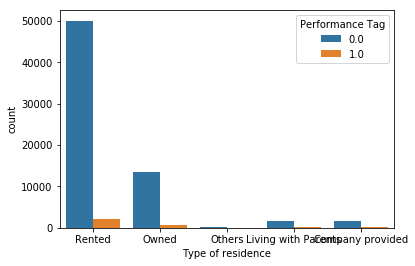

In [47]:
p = sns.countplot(data=demo_wo_woe, x = 'Type of residence',hue = 'Performance Tag')

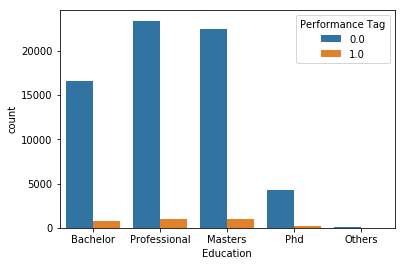

In [48]:
p = sns.countplot(data=demo_wo_woe, x = 'Education',hue = 'Performance Tag')

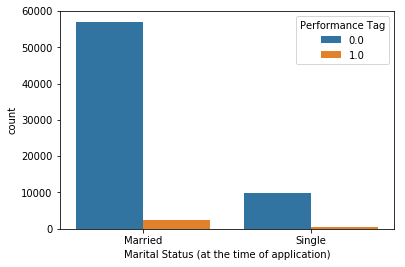

In [49]:
p = sns.countplot(data=demo_wo_woe, x = 'Marital Status (at the time of application)',hue = 'Performance Tag')

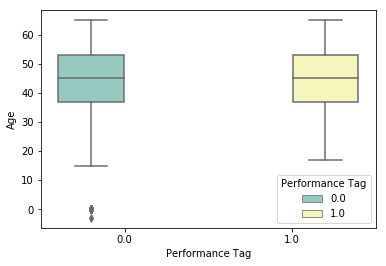

In [50]:
ax = sns.boxplot(x="Performance Tag", y="Age", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

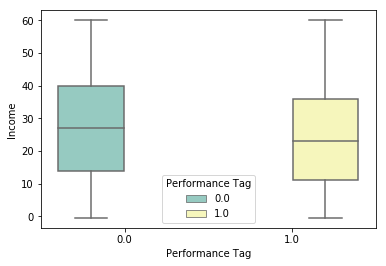

In [51]:
ax = sns.boxplot(x="Performance Tag", y="Income", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

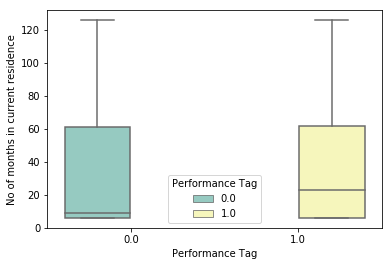

In [52]:
ax = sns.boxplot(x="Performance Tag", y="No of months in current residence", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

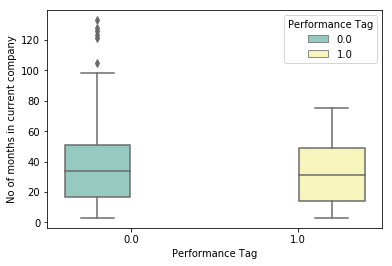

In [53]:
ax = sns.boxplot(x="Performance Tag", y="No of months in current company", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

#### Bi-Variate ananlysis for CreditBureau

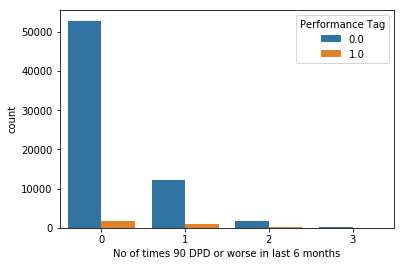

In [54]:
p = sns.countplot(data=CreditBureau, x = 'No of times 90 DPD or worse in last 6 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 90 DPD in last 6 months

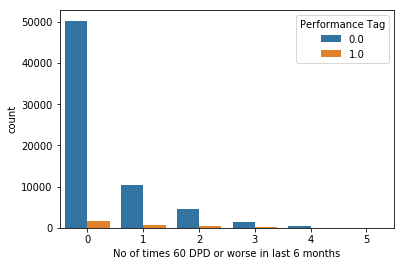

In [55]:
p = sns.countplot(data=CreditBureau, x = 'No of times 60 DPD or worse in last 6 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 60 DPD in last 6 months

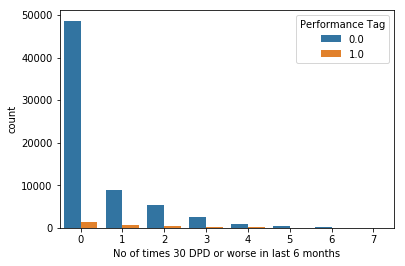

In [56]:
p = sns.countplot(data=CreditBureau, x = 'No of times 30 DPD or worse in last 6 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 30 DPD in last 6 months

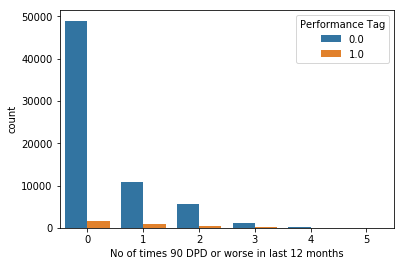

In [57]:
p = sns.countplot(data=CreditBureau, x = 'No of times 90 DPD or worse in last 12 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 90 DPD in last 12 months

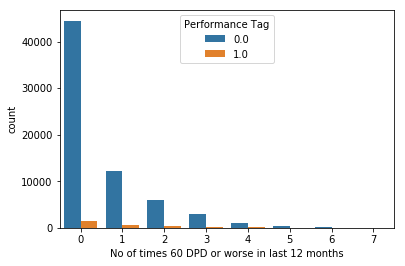

In [58]:
p = sns.countplot(data=CreditBureau, x = 'No of times 60 DPD or worse in last 12 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 60 DPD in last 12 months

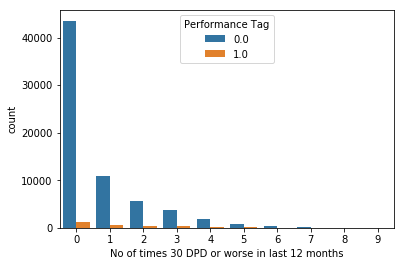

In [59]:
p = sns.countplot(data=CreditBureau, x = 'No of times 30 DPD or worse in last 12 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 30 DPD in last 12 months

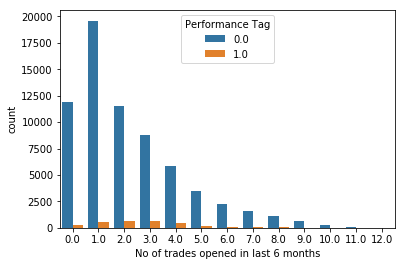

In [60]:
p = sns.countplot(data=CreditBureau, x = 'No of trades opened in last 6 months',hue = 'Performance Tag')
# Trades which are open 4 times in last 6 months tends to default more

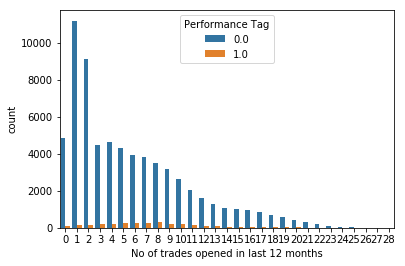

In [61]:
p = sns.countplot(data=CreditBureau, x = 'No of trades opened in last 12 months',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters with increase in No.of.trades.opened.in.last.12.months

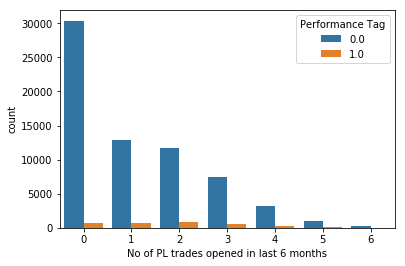

In [62]:

p = sns.countplot(data=CreditBureau, x = 'No of PL trades opened in last 6 months',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters with increase in No.of.trades.opened.in.last.12.months

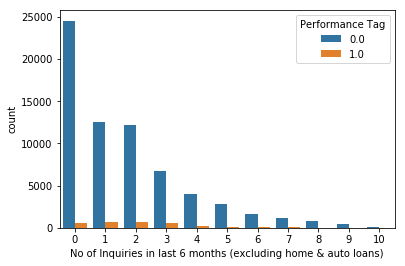

In [63]:
p = sns.countplot(data=CreditBureau, x = 'No of Inquiries in last 6 months (excluding home & auto loans)',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

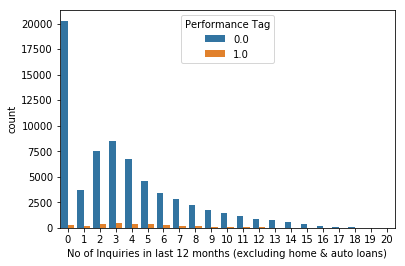

In [64]:
p = sns.countplot(data=CreditBureau, x = 'No of Inquiries in last 12 months (excluding home & auto loans)',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

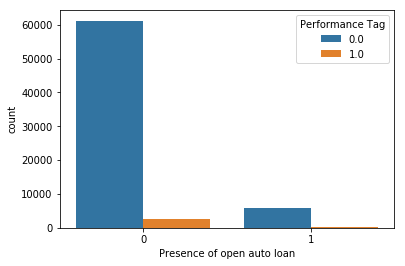

In [66]:
p = sns.countplot(data=CreditBureau, x = 'Presence of open auto loan',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

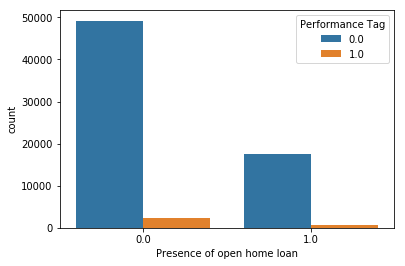

In [67]:
p = sns.countplot(data=CreditBureau, x = 'Presence of open home loan',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

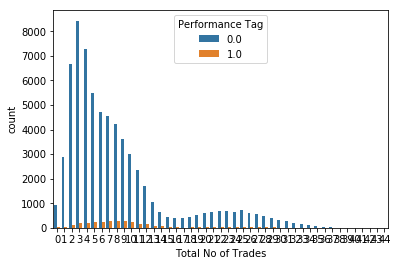

In [68]:
p = sns.countplot(data=CreditBureau, x = 'Total No of Trades',hue = 'Performance Tag')
# No appropriate pattern found in Total No of Trades

#### Finding correlation on Numerical data


### Conclusions from EDA:

  #1. Demographic variables are not very good predictors of defaulting. Only below 3 variables seems significant.
      #Income
      #No.of.months.in.current.residence
      #No.of.months.in.current.company

  #2. credit bureau dataset has many variables which seems like good predictors of defaulters.
      #No.of.times.90.DPD.or.worse.in.last.6.months
      #No.of.times.60.DPD.or.worse.in.last.6.months
      #No.of.times.30.DPD.or.worse.in.last.6.months
      #No.of.times.90.DPD.or.worse.in.last.12.months
      #No.of.times.60.DPD.or.worse.in.last.12.months
      #No.of.times.30.DPD.or.worse.in.last.12.months
      #No.of.trades.opened.in.last.6.months
      #No.of.PL.trades.opened.in.last.6.months
      #No.of.PL.trades.opened.in.last.12.months

  #3. There is no correlation between numeric variables of demographic dataset.

  #4. Few numeric variables of Credit bureau dataset show strong positive correlation with other variables.
      #The 6 variables - No.of.times 90/60/30 DPD.or.worse.in.last.6/12 months are highy correlated among themselves.
      #No of enquiries in last 6 months/12 months excluding home, auto loan variables are highly correlated.
      #No. of trade opened in 6/12 months,total number of trades, no of PL trades in 6/12 months are correlated.


### Outlier treatment

###### There is some outliers in data set Which need to be treated 
In Demographics data

    Age
    No of months in current company
    
In Credit Bureau

    No of trades opened in last 12 months   >21
    Total No of Trades >31
    No of Inquiries in last 12 months (excluding home & auto loans) >15
    No of PL trades opened in last 12 months  > 9
    No of times 30 DPD or worse in last 6 months > 2
    No of times 60 DPD or worse in last 6 months  > 2
    No of times 90 DPD or worse in last 6 months  > 1
    No of times 90 DPD or worse in last 12 months >2
    No of times 60 DPD or worse in last 12 months >2
    No of times 30 DPD or worse in last 12 months > 5
    Avgas CC Utilization in last 12 months
    No of trades opened in last 6 months
    No of PL trades opened in last 6 months > 4 
    No of Inquiries in last 6 months (excluding home & auto loans) > 6
                                      

In [85]:
demographics['Age'].quantile([0, 1, 0.01])  
demographics.loc[demographics['Age'] < 27, 'Age'] = 27

0.00     0.0
1.00    31.0
0.01     0.0
Name: Total No of Trades, dtype: float64

In [70]:
demographics['No of months in current company'].quantile([0, 1, 0.01])  
demographics.loc[demographics['No of months in current company'] > 74, 'No of months in current company'] = 74

In [87]:
## In Credit Bureau
CreditBureau['No of trades opened in last 12 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of trades opened in last 12 months'] >21 , 'No of trades opened in last 12 months'] = 21

CreditBureau['Total No of Trades'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['Total No of Trades'] >31 , 'Total No of Trades'] = 31

CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'] >15 , 'No of Inquiries in last 12 months (excluding home & auto loans)'] = 15
CreditBureau['No of PL trades opened in last 12 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of PL trades opened in last 12 months'] >9 , 'No of PL trades opened in last 12 months'] = 9

CreditBureau['No of times 30 DPD or worse in last 6 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of times 30 DPD or worse in last 6 months'] >2 , 'No of times 30 DPD or worse in last 6 months'] = 2
CreditBureau['No of times 60 DPD or worse in last 6 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of times 60 DPD or worse in last 6 months'] >2 , 'No of times 60 DPD or worse in last 6 months'] = 2
CreditBureau['No of times 90 DPD or worse in last 6 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of times 90 DPD or worse in last 6 months'] >1 , 'No of times 90 DPD or worse in last 6 months'] = 1

CreditBureau['No of times 30 DPD or worse in last 12 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of times 30 DPD or worse in last 12 months'] >5 , 'No of times 30 DPD or worse in last 12 months'] = 5
CreditBureau['No of times 60 DPD or worse in last 12 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of times 60 DPD or worse in last 12 months'] >2 , 'No of times 60 DPD or worse in last 12 months'] = 2
CreditBureau['No of times 90 DPD or worse in last 12 months'].quantile([0, 1, 0.01]) 
CreditBureau.loc[CreditBureau['No of times 90 DPD or worse in last 12 months'] >2 , 'No of times 90 DPD or worse in last 12 months'] = 2

CreditBureau['No of PL trades opened in last 6 months'].quantile([0, 1, 0.01])
CreditBureau.loc[CreditBureau['No of PL trades opened in last 6 months'] >4 , 'No of PL trades opened in last 6 months'] = 4
CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'].quantile([0, 1, 0.01])
CreditBureau.loc[CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'] > 6 , 'No of Inquiries in last 6 months (excluding home & auto loans)'] = 6


##### All possible outliers are treated based on that possible values

In [75]:
# Taking backup of the datasets
credit_bf_model = CreditBureau
demo_bf_model = demographics

In [92]:
credit_bf_model.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [93]:
demo_bf_model.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
